In [2]:
#Let's mount the google drive with colab:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
#importing python libraries for analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Loading the EDA Data for Credit Risk Modelling of Leading European P2P lending platform Bondora from Google Drive:

df= pd.read_csv("/content/drive/MyDrive/Bondora_eda_done.csv") 
#Path of the Google drive source
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default_Status
0,0.0,0.0,115.0410,True,Income Unverified and Cross Referenced by Phone,Estonian,61.0,Female,EE,319.5582,...,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,Default
1,0.0,0.0,140.6057,False,Income Unverified and Cross Referenced by Phone,Estonian,48.0,Female,EE,191.7349,...,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,Default
2,0.0,0.0,319.5580,True,Income Unverified and Cross Referenced by Phone,Estonian,58.0,Female,EE,319.5582,...,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0.0,0.0,57.5205,True,Income Unverified and Cross Referenced by Phone,Estonian,23.0,Female,EE,127.8233,...,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,Default
4,0.0,0.0,319.5582,True,Income Unverified and Cross Referenced by Phone,Estonian,25.0,Female,EE,319.5582,...,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


In [6]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default_Status'],
      dtype='object')

In [7]:
df['Default_Status'].value_counts()

Default        77515
Not Default    57014
Name: Default_Status, dtype: int64

# **Feature Engineering:**

Handling Outliers (already done in EDA)

Handling Null values (already done in EDA)

Categorical Feature Encoding (Label & Ordinal Encoding )

Spiliting Data into train and test sets & Feature scaling (Standardization, Normalization)

Feature extraction and Dimensionality reduction using PCA

Feature Selection & Mutual Information Score ( Feature Utility  MI Metric ) 


# **Feature Encoding**

Selecting the Features with Categorical Values.
And removing the Target Feature (Default Status) along with City and County Since the two have numerous no. of values.

In [8]:
object_cols = [col_name for col_name in df.columns if df[col_name].dtype == 'O']
to_remove = ['Default_Status', 'City', 'County']
other_cols = list(set(object_cols) - set(to_remove))
other_cols

['Country',
 'EmploymentStatus',
 'VerificationType',
 'Gender',
 'OccupationArea',
 'MaritalStatus',
 'LanguageCode',
 'CreditScoreEsMicroL',
 'EmploymentDurationCurrentEmployer',
 'UseOfLoan',
 'Rating',
 'Education']

In [9]:
indp_feat_df=df.loc[:, df.columns.drop(['Default_Status'])]
indp_feat_df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0.0,0.0,115.0410,True,Income Unverified and Cross Referenced by Phone,Estonian,61.0,Female,EE,319.5582,...,False,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0
1,0.0,0.0,140.6057,False,Income Unverified and Cross Referenced by Phone,Estonian,48.0,Female,EE,191.7349,...,False,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0
2,0.0,0.0,319.5580,True,Income Unverified and Cross Referenced by Phone,Estonian,58.0,Female,EE,319.5582,...,True,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0
3,0.0,0.0,57.5205,True,Income Unverified and Cross Referenced by Phone,Estonian,23.0,Female,EE,127.8233,...,False,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0
4,0.0,0.0,319.5582,True,Income Unverified and Cross Referenced by Phone,Estonian,25.0,Female,EE,319.5582,...,False,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0


In [10]:
target_f = df.Default_Status
target_f

0         Default
1         Default
2         Default
3         Default
4         Default
           ...   
134524    Default
134525    Default
134526    Default
134527    Default
134528    Default
Name: Default_Status, Length: 134529, dtype: object

**Label Encoding for the Target Variable** 

Mapping 'Default' to 1 and 'Not Default' to 0.

In [11]:
mapping = {'Default': 1, 'Not Default': 0}
df.Default_Status = [mapping[i] for i in df.Default_Status]
df['Default_Status'].value_counts()

1    77515
0    57014
Name: Default_Status, dtype: int64

In [183]:
# colns1=[]
# colns1=[]
# for cname in other_cols:
#    if df[cname].nunique() <= 10:
#      colns1.append(cname)
#    else:
#      colns2.append(cname)


# print(colns1)
# print(colns2)

**Making two seperate list of columns having**

**Nominal values (colns1) for OneHot Encoding  and**

**Ordinal values (colns2) for Ordinal Encoding.**







In [12]:
colns1 = ['UseOfLoan', 'OccupationArea', 'EmploymentStatus', 'MaritalStatus', 'VerificationType', 'Country', 'Education', 'LanguageCode', 'Gender']
colns2 = ['EmploymentDurationCurrentEmployer','CreditScoreEsMicroL', 'Rating']

**Applying OneHotEncoding to the Categorical Columns having Nominal Values.**


In [13]:
df1=df[df.columns.intersection(colns1)]
print(df1.shape)
df1.head()

(134529, 9)


,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea
0,Income Unverified and Cross Referenced by Phone,Estonian,Female,EE,Other,Vocational education,Married,Fully employed,Retail and Wholesale
1,Income Unverified and Cross Referenced by Phone,Estonian,Female,EE,Other,Higher education,Divorced,Fully employed,Education
2,Income Unverified and Cross Referenced by Phone,Estonian,Female,EE,Home improvement,Secondary education,Married,Fully employed,Hospitality and Catering
3,Income Unverified and Cross Referenced by Phone,Estonian,Female,EE,Loan consolidation,Basic education,Single,Not Mentioned,Other
4,Income Unverified and Cross Referenced by Phone,Estonian,Female,EE,Vehicle,Secondary education,Cohabitant,Fully employed,Retail and Wholesale


In [14]:
dummy_df = pd.get_dummies(df[df1.columns])
print(dummy_df.shape)
dummy_df.head(20)

(134529, 75)


,VerificationType_Income Unverified,VerificationType_Income Unverified and Cross Referenced by Phone,VerificationType_Income Verified,VerificationType_Income and Expense Verified,VerificationType_Not Set,LanguageCode_ Estonian,LanguageCode_English,LanguageCode_Finnish,LanguageCode_German,LanguageCode_Others,...,OccupationArea_Info and Telecom,OccupationArea_Mining,OccupationArea_Not Present,OccupationArea_Other,OccupationArea_Processing,OccupationArea_Real-estate,OccupationArea_Research,OccupationArea_Retail and Wholesale,OccupationArea_Transport and Warehousing,OccupationArea_Utilities
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
pd.get_dummies(df1, prefix_sep='_').head(20)

,VerificationType_Income Unverified,VerificationType_Income Unverified and Cross Referenced by Phone,VerificationType_Income Verified,VerificationType_Income and Expense Verified,VerificationType_Not Set,LanguageCode_ Estonian,LanguageCode_English,LanguageCode_Finnish,LanguageCode_German,LanguageCode_Others,...,OccupationArea_Info and Telecom,OccupationArea_Mining,OccupationArea_Not Present,OccupationArea_Other,OccupationArea_Processing,OccupationArea_Real-estate,OccupationArea_Research,OccupationArea_Retail and Wholesale,OccupationArea_Transport and Warehousing,OccupationArea_Utilities
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
encoded_cols= dummy_df.keys()
encoded_cols

Index(['VerificationType_Income Unverified',
       'VerificationType_Income Unverified and Cross Referenced by Phone',
       'VerificationType_Income Verified',
       'VerificationType_Income and Expense Verified',
       'VerificationType_Not Set', 'LanguageCode_ Estonian',
       'LanguageCode_English', 'LanguageCode_Finnish', 'LanguageCode_German',
       'LanguageCode_Others', 'LanguageCode_Russian', 'LanguageCode_Slovakian',
       'LanguageCode_Spanish', 'Gender_Female', 'Gender_Male',
       'Gender_Undefined', 'Country_EE', 'Country_ES', 'Country_FI',
       'Country_SK', 'UseOfLoan_ Accounts receivable financing',
       'UseOfLoan_Acquisition of real estate',
       'UseOfLoan_Acquisition of stocks', 'UseOfLoan_Business',
       'UseOfLoan_Construction finance', 'UseOfLoan_Education',
       'UseOfLoan_Health', 'UseOfLoan_Home improvement',
       'UseOfLoan_Loan consolidation', 'UseOfLoan_Not set category',
       'UseOfLoan_Other', 'UseOfLoan_Other business',
       'Use

In [20]:
oh_enc = OneHotEncoder(sparse=False,)

In [22]:
oh_enc_arr = oh_enc.fit_transform(df[df1.columns])
print(oh_enc_arr.shape)
oh_enc_arr

(134529, 75)


array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
df1 = pd.DataFrame(oh_enc_arr, columns=[dummy_df[encoded_cols].columns])
df1.head(20)

,VerificationType_Income Unverified,VerificationType_Income Unverified and Cross Referenced by Phone,VerificationType_Income Verified,VerificationType_Income and Expense Verified,VerificationType_Not Set,LanguageCode_ Estonian,LanguageCode_English,LanguageCode_Finnish,LanguageCode_German,LanguageCode_Others,...,OccupationArea_Info and Telecom,OccupationArea_Mining,OccupationArea_Not Present,OccupationArea_Other,OccupationArea_Processing,OccupationArea_Real-estate,OccupationArea_Research,OccupationArea_Retail and Wholesale,OccupationArea_Transport and Warehousing,OccupationArea_Utilities
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Applying Ordinal Encoding to the remaining 3 Columns** 

**'EmploymentDurationCurrentEmployer', 	'Rating',	 'CreditScoreEsMicroL'**

In [24]:
df2=df[df.columns.intersection(colns2)]
print(df2.shape)
df2.head()

(134529, 3)


,EmploymentDurationCurrentEmployer,Rating,CreditScoreEsMicroL
0,UpTo3Years,E,M
1,MoreThan5Years,E,M
2,UpTo4Years,E,M
3,UpTo2Years,E,M
4,UpTo2Years,E,M


In [25]:
df2.EmploymentDurationCurrentEmployer.unique()

array(['UpTo3Years', 'MoreThan5Years', 'UpTo4Years', 'UpTo2Years',
       'UpTo1Year', 'UpTo5Years', 'TrialPeriod', 'Other', 'Retiree'],
      dtype=object)

In [26]:
order_Label= {"TrialPeriod":0,"UpTo1Year":1, "UpTo2Years":2, "UpTo3Years":3, "UpTo4Years":4,
       "UpTo5Years":5, "MoreThan5Years":6, "Other":7, "Retiree":8}

In [27]:
df2["EmploymentDurationCurrentEmployer"] = df2["EmploymentDurationCurrentEmployer"].map(order_Label)

In [28]:
df2.CreditScoreEsMicroL.unique()

array(['M', 'M3', 'M5', 'M1', 'M9', 'M2', 'M6', 'M4', 'M8', 'M7', 'M10'],
      dtype=object)

In [29]:
df2.Rating.unique()

array(['E', 'F', 'C', 'HR', 'D', 'B', 'A', 'AA'], dtype=object)

In [30]:
df2.Rating.value_counts()

E     27191
F     24161
D     21558
C     19845
B     14636
HR    14122
A      6905
AA     6111
Name: Rating, dtype: int64

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
ordinal_encoder = OrdinalEncoder() 
df2[colns2]= ordinal_encoder.fit_transform(df2[colns2])


In [33]:
df2.Rating.value_counts()

5.0    27191
6.0    24161
4.0    21558
3.0    19845
2.0    14636
7.0    14122
0.0     6905
1.0     6111
Name: Rating, dtype: int64

In [34]:
df2.head(20)

,EmploymentDurationCurrentEmployer,Rating,CreditScoreEsMicroL
0,3.0,5.0,0.0
1,6.0,5.0,0.0
2,4.0,5.0,0.0
3,2.0,5.0,0.0
4,2.0,5.0,0.0
5,2.0,5.0,0.0
6,6.0,5.0,0.0
7,4.0,5.0,0.0
8,4.0,5.0,0.0
9,1.0,5.0,0.0


In [35]:
#Numerical Features in Dataset
num_features = [col_name for col_name in df.columns if df[col_name].dtype != 'O']
dfn=df[num_features]
dfn.head(20)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default_Status
0,0.0,0.0,115.0410,True,61.0,319.5582,115.0408,30.0,12,112.803338,...,False,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,1
1,0.0,0.0,140.6057,False,48.0,191.7349,140.6057,25.0,1,112.803338,...,False,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,1
2,0.0,0.0,319.5580,True,58.0,319.5582,319.5409,25.0,20,112.803338,...,True,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0.0,0.0,57.5205,True,23.0,127.8233,57.5205,45.0,15,112.803338,...,False,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,1
4,0.0,0.0,319.5582,True,25.0,319.5582,319.5436,30.0,12,112.803338,...,False,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1
5,0.0,0.0,300.3845,True,22.0,300.3847,300.4314,30.0,24,112.803338,...,False,300.4314,124.2294,0.00,0.00,3,338.7324,0.0000,0,1
6,0.0,0.0,191.7350,True,47.0,191.7349,191.7445,32.0,20,112.803338,...,False,191.7445,172.9222,0.00,0.00,1,223.6709,0.0000,0,1
7,0.0,0.0,31.9558,True,23.0,191.7349,31.9518,20.0,6,112.803338,...,False,31.9518,11.3105,0.00,0.00,3,428.2235,0.0000,0,1
8,0.0,0.0,31.9559,True,23.0,178.9526,31.9498,20.0,12,112.803338,...,False,31.9498,16.4482,0.00,0.00,4,460.1753,0.0000,0,1
9,0.0,0.0,319.5581,True,38.0,319.5582,319.5583,25.0,12,112.803338,...,False,319.5583,45.4153,0.00,0.00,0,0.0000,0.0000,0,1


**We see that we need to encode/map the Feature with Boolean values (True or False) to 1 or 0.** 

In [36]:
bool_num_catg=["NewCreditCustomer","Restructured"]
for i in bool_num_catg:
  print(dfn[i].value_counts())
  dfn[i] = dfn[i].astype(int)
  print(dfn[i].value_counts())


True     77808
False    56721
Name: NewCreditCustomer, dtype: int64
1    77808
0    56721
Name: NewCreditCustomer, dtype: int64
False    106900
True      27629
Name: Restructured, dtype: int64
0    106900
1     27629
Name: Restructured, dtype: int64


In [37]:
print("dfn :",dfn.shape)     # Numerical values
print("df1 :",df1.shape)     # Categorical Encoded 
print("df2 :",df2.shape)     # Categorical Encoded 

dfn : (134529, 28)
df1 : (134529, 75)
df2 : (134529, 3)


**Now we will concat the 3 DataFrames dfn, df1, df2 together.
After this, all the columns will have the numeric or encoded values in them.**

In [38]:
result_df = pd.concat([dfn, df1, df2], axis=1)
print(result_df.shape)
result_df.head(20)

(134529, 106)


,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,"(OccupationArea_Other,)","(OccupationArea_Processing,)","(OccupationArea_Real-estate,)","(OccupationArea_Research,)","(OccupationArea_Retail and Wholesale,)","(OccupationArea_Transport and Warehousing,)","(OccupationArea_Utilities,)",EmploymentDurationCurrentEmployer,Rating,CreditScoreEsMicroL
0,0.0,0.0,115.0410,1,61.0,319.5582,115.0408,30.0,12,112.803338,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,0.0
1,0.0,0.0,140.6057,0,48.0,191.7349,140.6057,25.0,1,112.803338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0
2,0.0,0.0,319.5580,1,58.0,319.5582,319.5409,25.0,20,112.803338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0
3,0.0,0.0,57.5205,1,23.0,127.8233,57.5205,45.0,15,112.803338,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0
4,0.0,0.0,319.5582,1,25.0,319.5582,319.5436,30.0,12,112.803338,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0
5,0.0,0.0,300.3845,1,22.0,300.3847,300.4314,30.0,24,112.803338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0
6,0.0,0.0,191.7350,1,47.0,191.7349,191.7445,32.0,20,112.803338,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0
7,0.0,0.0,31.9558,1,23.0,191.7349,31.9518,20.0,6,112.803338,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0
8,0.0,0.0,31.9559,1,23.0,178.9526,31.9498,20.0,12,112.803338,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0
9,0.0,0.0,319.5581,1,38.0,319.5582,319.5583,25.0,12,112.803338,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0


In [39]:
result_dfX=result_df.drop(['Default_Status'],axis=1)
result_dfX_columns= result_dfX.columns
result_dfX_columns

Index([                       'BidsPortfolioManager',
                                           'BidsApi',
                                        'BidsManual',
                                 'NewCreditCustomer',
                                               'Age',
                                     'AppliedAmount',
                                            'Amount',
                                          'Interest',
                                      'LoanDuration',
                                    'MonthlyPayment',
       ...
                           ('OccupationArea_Other',),
                      ('OccupationArea_Processing',),
                     ('OccupationArea_Real-estate',),
                        ('OccupationArea_Research',),
            ('OccupationArea_Retail and Wholesale',),
       ('OccupationArea_Transport and Warehousing',),
                       ('OccupationArea_Utilities',),
                 'EmploymentDurationCurrentEmployer',
                 

# **Feature Scaling**

**We perform Feature Scaling to reduce the variance effect and to overcome the fitting problem.**

In [40]:
from sklearn.preprocessing import StandardScaler # for Standardization
from sklearn.preprocessing import MinMaxScaler   # for Normalization
from sklearn.model_selection import train_test_split


In [41]:
y = result_df.Default_Status
y=y.to_numpy()
X = result_df.drop(['Default_Status'],axis=1)

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,stratify=y , random_state=0)

In [42]:
num_f = X.columns
num_f

Index([                       'BidsPortfolioManager',
                                           'BidsApi',
                                        'BidsManual',
                                 'NewCreditCustomer',
                                               'Age',
                                     'AppliedAmount',
                                            'Amount',
                                          'Interest',
                                      'LoanDuration',
                                    'MonthlyPayment',
       ...
                           ('OccupationArea_Other',),
                      ('OccupationArea_Processing',),
                     ('OccupationArea_Real-estate',),
                        ('OccupationArea_Research',),
            ('OccupationArea_Retail and Wholesale',),
       ('OccupationArea_Transport and Warehousing',),
                       ('OccupationArea_Utilities',),
                 'EmploymentDurationCurrentEmployer',
                 

Applying **Standardization**  ( Mean = 0, Std. Deviation = 1)

By using **StandardScaler**

In [43]:
Scalar = StandardScaler()
X_train_sc = pd.DataFrame(Scalar.fit_transform(X_train[num_f]), columns=result_dfX_columns)
X_test_sc = pd.DataFrame(Scalar.transform(X_test[num_f]), columns=result_dfX_columns)

In [44]:
X_train_sc.describe().round(2)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,"(OccupationArea_Other,)","(OccupationArea_Processing,)","(OccupationArea_Real-estate,)","(OccupationArea_Research,)","(OccupationArea_Retail and Wholesale,)","(OccupationArea_Transport and Warehousing,)","(OccupationArea_Utilities,)",EmploymentDurationCurrentEmployer,Rating,CreditScoreEsMicroL
count,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,...,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.94,-0.63,-0.96,-1.18,-3.10,-1.19,-1.26,-1.75,-2.97,-1.28,...,-0.26,-0.16,-0.06,-0.06,-0.17,-0.14,-0.05,-2.17,-2.19,-0.27
25%,-0.76,-0.63,-0.77,-1.18,-0.80,-0.84,-0.89,-0.78,-0.67,-0.85,...,-0.26,-0.16,-0.06,-0.06,-0.17,-0.14,-0.05,-0.77,-0.61,-0.27
50%,-0.41,-0.63,-0.34,0.85,-0.07,-0.25,-0.18,-0.16,0.12,-0.11,...,-0.26,-0.16,-0.06,-0.06,-0.17,-0.14,-0.05,0.17,-0.09,-0.27
75%,0.45,0.38,0.46,0.85,0.74,0.64,0.58,0.38,0.91,0.45,...,-0.26,-0.16,-0.06,-0.06,-0.17,-0.14,-0.05,0.64,0.96,-0.27
max,2.27,1.91,2.32,0.85,2.93,2.90,2.77,2.13,0.91,2.59,...,3.86,6.43,16.60,15.54,6.04,7.27,19.69,1.57,1.48,7.85


 Applying **Normalization**  (Min value = 0 , Max value = 1 )

 By using **MinMaxScaler**

In [45]:
Scale = MinMaxScaler()
X_train_nm = pd.DataFrame(Scale.fit_transform(X_train[num_f]),columns=result_dfX_columns)
X_test_nm = pd.DataFrame(Scale.transform(X_test[num_f]),columns=result_dfX_columns)

In [46]:
X_train_nm.describe().round(2)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,"(OccupationArea_Other,)","(OccupationArea_Processing,)","(OccupationArea_Real-estate,)","(OccupationArea_Research,)","(OccupationArea_Retail and Wholesale,)","(OccupationArea_Transport and Warehousing,)","(OccupationArea_Utilities,)",EmploymentDurationCurrentEmployer,Rating,CreditScoreEsMicroL
count,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,...,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00,107623.00
mean,0.29,0.25,0.29,0.58,0.51,0.29,0.31,0.45,0.77,0.33,...,0.06,0.02,0.00,0.00,0.03,0.02,0.00,0.58,0.60,0.03
std,0.31,0.39,0.30,0.49,0.17,0.24,0.25,0.26,0.26,0.26,...,0.24,0.15,0.06,0.06,0.16,0.13,0.05,0.27,0.27,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.06,0.00,0.06,0.00,0.38,0.08,0.09,0.25,0.59,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.43,0.00
50%,0.16,0.00,0.19,1.00,0.50,0.23,0.27,0.41,0.80,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.57,0.00
75%,0.43,0.40,0.43,1.00,0.64,0.45,0.46,0.55,1.00,0.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.86,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# **Feature Extraction and Dimensionality-reduction using PCA**

In [90]:
from sklearn.decomposition import PCA

pca = PCA(0.95)                   # no of components or the % of the useful features to be retained/considered and then create the new diemensions
#pca = PCA(n_components = 10)     # by giving the no in n_components we explicitly require only that specific no of features as the principal components.
X_train_sc_pca =pd.DataFrame(pca.fit_transform(X_train_sc))
  
X_train_sc_pca.shape

(107623, 72)

In [91]:
pca.n_components_

72

In [92]:
ev= pca.explained_variance_ratio_  
ev

array([0.09636381, 0.06460031, 0.04649646, 0.02864441, 0.02557287,
       0.02142428, 0.02065714, 0.01981036, 0.01876212, 0.01638045,
       0.01497755, 0.013858  , 0.01356824, 0.01352939, 0.01316349,
       0.01201593, 0.01189173, 0.01144498, 0.01102616, 0.01068395,
       0.01042573, 0.01035654, 0.01028778, 0.01019482, 0.0101136 ,
       0.01000323, 0.00997311, 0.00990315, 0.00985506, 0.0098466 ,
       0.00976001, 0.00973358, 0.00968688, 0.0096527 , 0.00961319,
       0.00958623, 0.00956846, 0.00952872, 0.00952547, 0.00952482,
       0.00952428, 0.00952412, 0.00952064, 0.00949192, 0.00943938,
       0.00941196, 0.00936807, 0.0093356 , 0.0092965 , 0.00923387,
       0.00919665, 0.00913739, 0.00909962, 0.00895184, 0.00891339,
       0.00883686, 0.00880249, 0.00861678, 0.0085538 , 0.00850868,
       0.00837072, 0.00823765, 0.00810412, 0.00806809, 0.00772355,
       0.00751221, 0.00720867, 0.00701441, 0.00646303, 0.00627815,
       0.00603502, 0.00564255])

1st pca component/column is capturing 09.63 % of the useful information or Variance.


2nd ----> 06.46 %

3rd ----> 04.64 %   

and so on......

In [93]:
ev_sum= (sum(pca.explained_variance_ratio_) * 100)
ev_sum

95.1433299726228

In [94]:
ev_cumsum= (np.cumsum(pca.explained_variance_ratio_) * 100)
ev_cumsum

array([ 9.63638083, 16.09641227, 20.7460581 , 23.6104995 , 26.16778601,
       28.31021356, 30.37592735, 32.3569632 , 34.23317507, 35.87121972,
       37.36897483, 38.75477453, 40.11159832, 41.46453692, 42.78088558,
       43.9824785 , 45.17165143, 46.31614979, 47.41876617, 48.48716112,
       49.52973387, 50.56538759, 51.59416547, 52.61364752, 53.62500771,
       54.62533046, 55.62264129, 56.61295667, 57.59846268, 58.58312245,
       59.55912316, 60.53248129, 61.50116951, 62.46643997, 63.4277588 ,
       64.38638207, 65.34322837, 66.29610011, 67.24864681, 68.20112847,
       69.15355632, 70.10596855, 71.05803298, 72.00722501, 72.9511629 ,
       73.89235908, 74.8291661 , 75.76272597, 76.69237561, 77.61576306,
       78.53542777, 79.4491666 , 80.35912869, 81.25431261, 82.14565138,
       83.02933694, 83.90958619, 84.77126425, 85.6266443 , 86.47751194,
       87.31458391, 88.13834905, 88.94876078, 89.75556939, 90.52792485,
       91.27914606, 92.00001281, 92.70145423, 93.34775772, 93.97

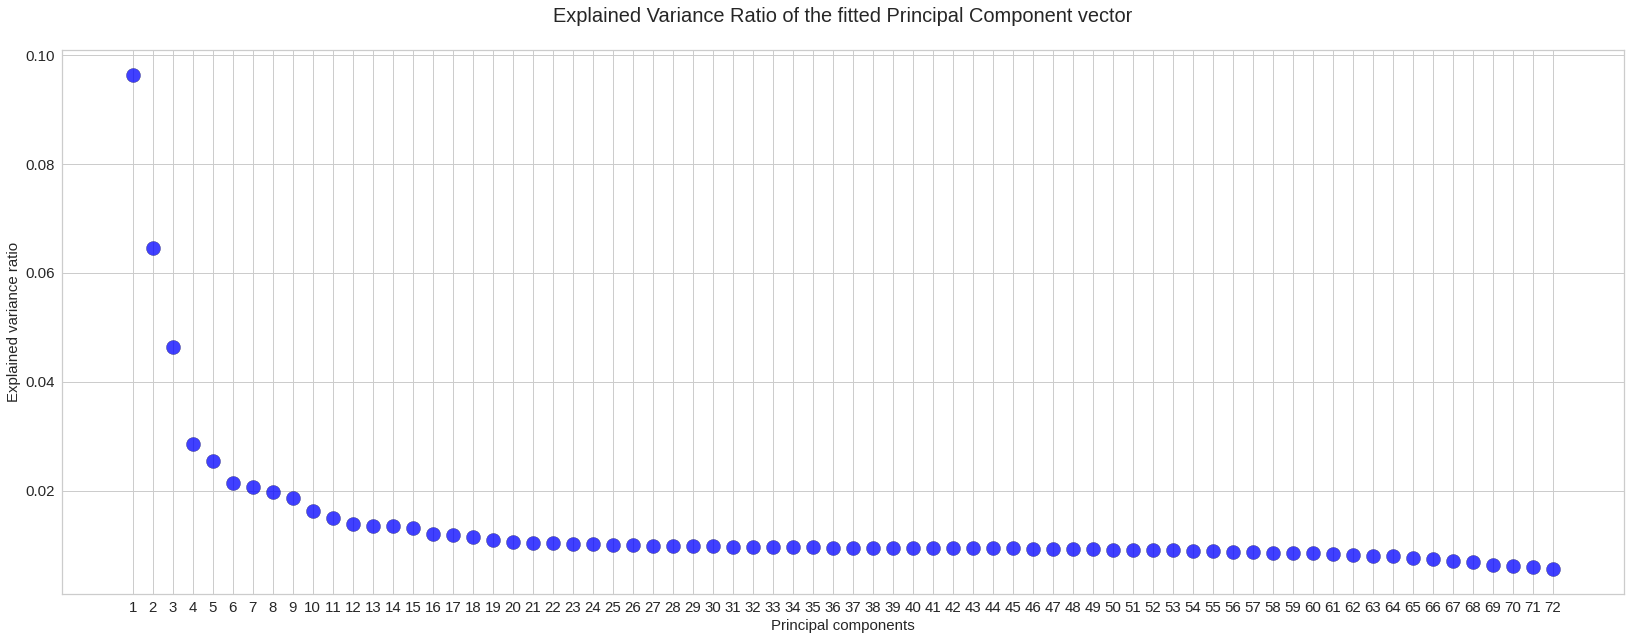

In [98]:
plt.figure(figsize=(28,10))
plt.scatter(x=[i+1 for i in range(len(ev))],
            y=ev, s=200, alpha=0.75,c='blue',edgecolor='k')
plt.grid(True)
plt.title("Explained Variance Ratio of the fitted Principal Component vector\n",fontsize=20)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(ev))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

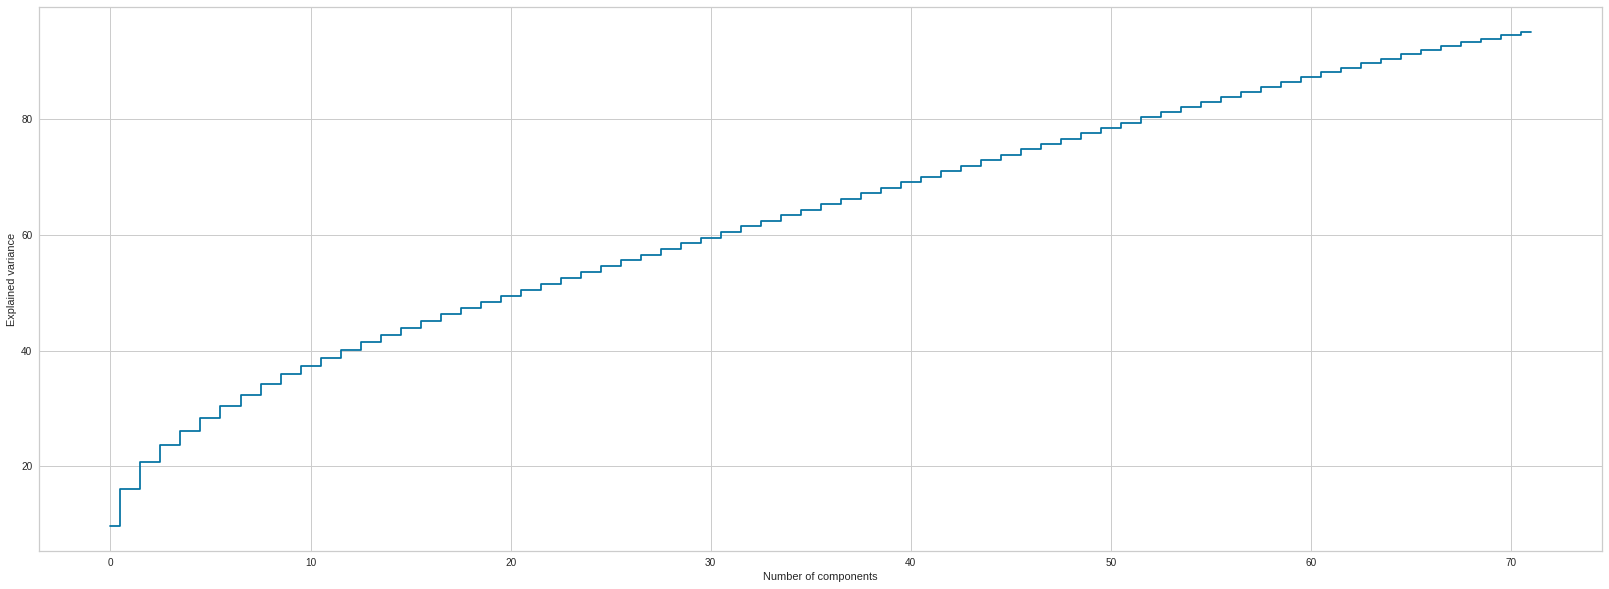

In [101]:
plt.figure(figsize=(28,10))
plt.step(range(0,len(ev_cumsum)), ev_cumsum, where='mid',label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

On applying PCA to our dataset with n_components=0.95. 

This will select the number of components while preserving 95% of the variability in the data.

This means that the algorithm has found 72 principal components to preserve 95% of the variability in the data. 

The X_train_pca array holds the values of all 72 principal components. 

We can visualize these values as in the following plot.

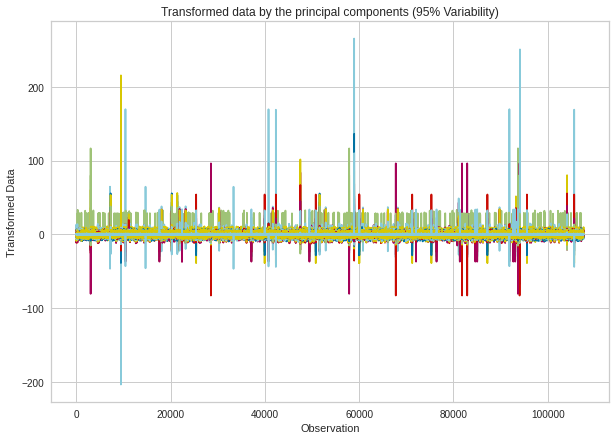

In [102]:
plt.figure(figsize=(10, 7))
plt.plot(X_train_sc_pca)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title('Transformed data by the principal components (95% Variability)')
plt.savefig('plot.png')

**On applying PCA by setting n_components=3**

Let’s apply PCA to our dataset with n_components=3.

 This will project our original data onto a three-dimensional subspace.
 
This will return 3 components that capture 20.74% of the variability in data.



In [65]:
from yellowbrick.features import PCA

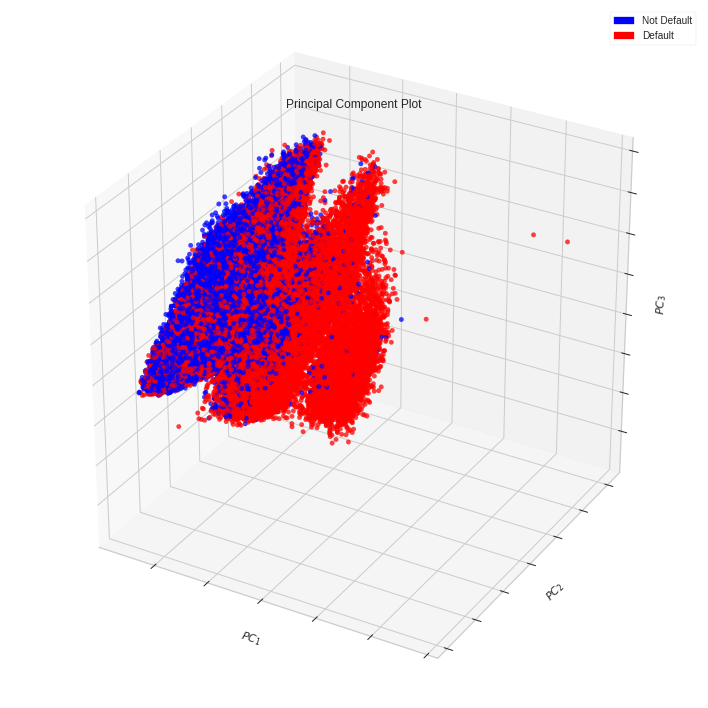

In [68]:
plt.figure(figsize =(10, 10))
visualizer_3 = PCA(scale=True, projection=3, classes=['Not Default', 'Default'], colors=['blue', 'red'])
plt.title('3 Important Principle Components with Max Variance')
visualizer_3.fit_transform(X_train, y_train) 
visualizer_3.show(outpath='3d_scatterplot_y.png')

**We will be using the selected number of components for preserving 95% of the variability in the data while we did PCA.**

**And then making the final DataFrame with the Target feature ('Default_Status') added back.** 

In [104]:
df_final=pd.DataFrame(X_train_sc_pca)
df_final.columns = ['PC_'+ str(col)  for col in df_final.columns]
df_final['Target']= df.Default_Status
df_final

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,Target
0,-1.801841,-1.582377,3.305100,0.443718,3.090137,-0.063459,-0.554905,0.797847,1.195532,-0.746757,...,0.397495,0.193032,0.322209,-0.414792,-0.149851,0.699449,0.139375,0.208515,0.131185,1
1,-1.794405,-1.042756,-1.618795,-2.142629,-0.885531,0.066370,-0.341100,-0.001578,-1.477130,-0.376541,...,0.127255,-0.093836,0.036842,-0.418856,-0.061372,-0.663077,0.642437,-0.429745,0.190303,1
2,-2.222026,-1.251343,-0.383084,-0.155080,-1.391933,-0.366933,1.795867,0.200686,0.672615,-0.839431,...,0.705198,-0.331308,0.382544,-0.512115,-0.303443,0.862111,-0.365323,0.218100,-0.233132,1
3,-0.850495,-0.433285,3.398332,-2.209468,3.612083,0.079364,-1.158631,-0.042306,0.176649,-0.061099,...,1.005400,-0.063057,0.346627,0.474317,0.072482,0.979808,0.659892,-0.295093,0.582418,1
4,-2.008005,-3.543268,0.937996,0.962051,0.589778,0.190018,-1.518485,-0.349127,0.069090,1.445702,...,-1.147806,-1.312438,0.094492,0.439745,0.347148,-0.171866,0.110780,0.116778,-0.134063,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107618,-2.099999,-3.755211,-0.774537,1.420310,-0.739800,-0.017259,1.184193,0.083555,-1.406072,-0.586552,...,-0.758816,0.650455,0.536295,0.934754,0.166635,0.296446,0.969701,-0.272077,-0.292223,0
107619,-1.793466,2.193417,3.345669,-2.280361,2.813213,-0.004654,-0.699236,0.409418,0.424448,0.505100,...,-0.819988,-1.216416,0.311190,-0.272029,-0.001679,-0.590954,-0.120828,0.012817,0.189924,0
107620,-1.353934,0.939835,1.420470,-1.375407,0.197709,0.003553,0.142665,0.067208,-1.155079,-1.265791,...,0.158566,0.092802,0.419485,0.526692,0.083911,0.767688,-0.387171,0.317778,-0.229954,1
107621,-1.663512,3.191444,0.363291,-0.499556,-2.984948,-0.080775,0.795258,-0.498950,-0.209325,-0.192023,...,0.828231,1.131604,-0.407748,0.201414,-0.258962,0.962951,-0.243307,-0.013887,-0.105354,1


# **Feature Selection & Mutual Information Score ( Feature Utility  MI Metric )** 

In [106]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(XX, yy):
    XX = XX.copy()
    for colname in XX.select_dtypes(["object", "category","boolean"]):
        XX[colname], _ = XX[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in XX.dtypes]
    mi_scores = mutual_info_classif(XX, yy, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=XX.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [108]:
XX = df.copy()
yy = XX.pop('Default_Status')

mi_scores = make_mi_scores(XX,yy)

PrincipalBalance                          0.244242
InterestAndPenaltyBalance                 0.206217
PrincipalPaymentsMade                     0.181217
Interest                                  0.135168
Amount                                    0.133822
AppliedAmount                             0.131571
City                                      0.128094
MonthlyPayment                            0.109425
UseOfLoan                                 0.098162
MaritalStatus                             0.097720
OccupationArea                            0.097282
PreviousRepaymentsBeforeLoan              0.096889
EmploymentStatus                          0.096795
County                                    0.095828
DebtToIncome                              0.090761
FreeCash                                  0.087643
BidsPortfolioManager                      0.085206
BidsManual                                0.055091
Rating                                    0.051455
LiabilitiesTotal               

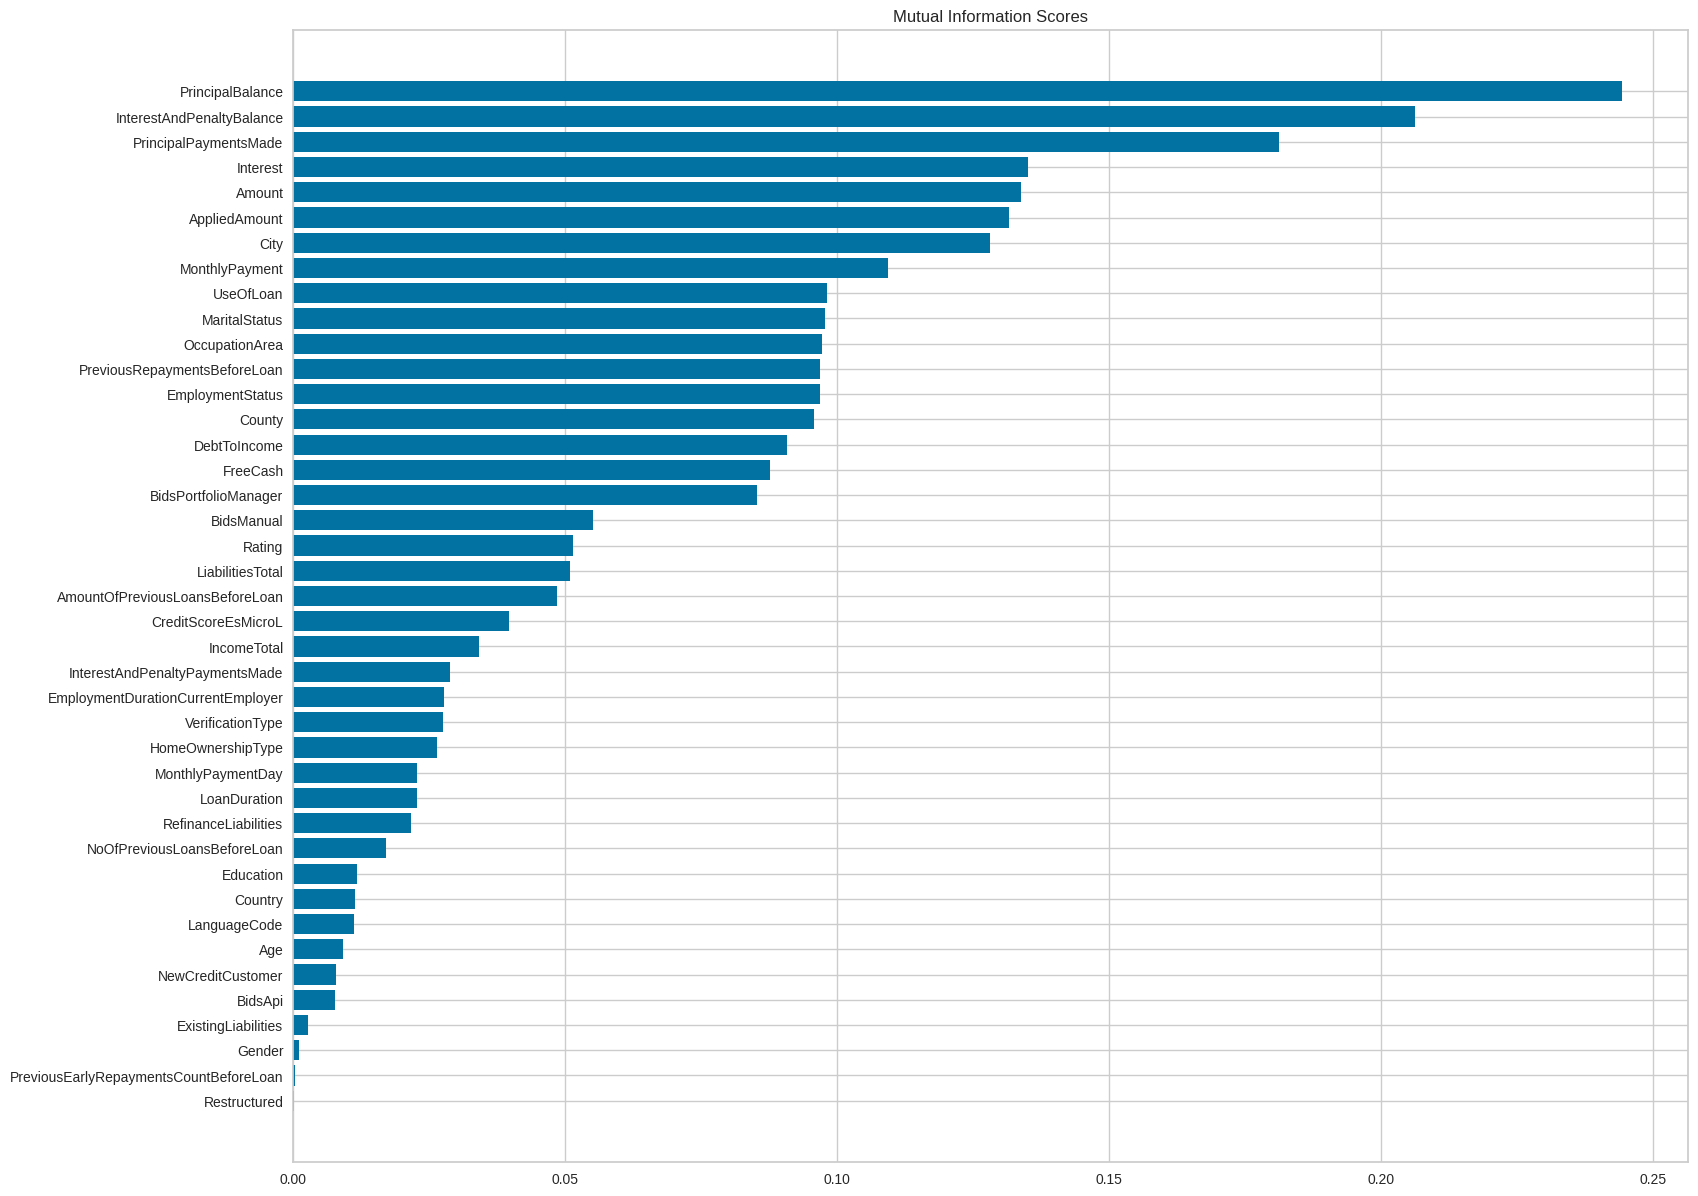

In [109]:
print(mi_scores)

plt.figure(dpi=100, figsize=(18, 15))
plot_mi_scores(mi_scores)


In [110]:
mi_score_selected_feature = np.where(mi_scores >0.085)[0]
mi_score_selected_feature 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [111]:
mi_scores=pd.DataFrame(mi_scores)
mi_scores.reset_index(inplace= True)
sf= mi_scores.nlargest(17,'MI Scores')['index']
selected_features= sf.to_list()
selected_features

['PrincipalBalance',
 'InterestAndPenaltyBalance',
 'PrincipalPaymentsMade',
 'Interest',
 'Amount',
 'AppliedAmount',
 'City',
 'MonthlyPayment',
 'UseOfLoan',
 'MaritalStatus',
 'OccupationArea',
 'PreviousRepaymentsBeforeLoan',
 'EmploymentStatus',
 'County',
 'DebtToIncome',
 'FreeCash',
 'BidsPortfolioManager']